### Ejercicios Clase 7

#### 1. Consultar la librería "scipy". Realizar la propiedad de desplazamiento =3 en el tiempo de la transformada z en python, la cual está definida por: x[n-n0] ↔ X(z)z^(-n0) . Graficar la respuesta en frecuencia y al impulso de la nueva función desplazada. ¿Qué se puede observar en estas gráficas?

Coeficientes de la nueva función de transferencia en el dominio Z:
num =  [  1.          +0.j         705.44592164+997.64718048j
   3.          +0.j        ]
den =  [1.00000000e+00+0.00000000e+00j 1.23916470e+04+3.61926958e-04j
 2.99999984e+00+5.84146618e-08j 1.61399035e-04+0.00000000e+00j]


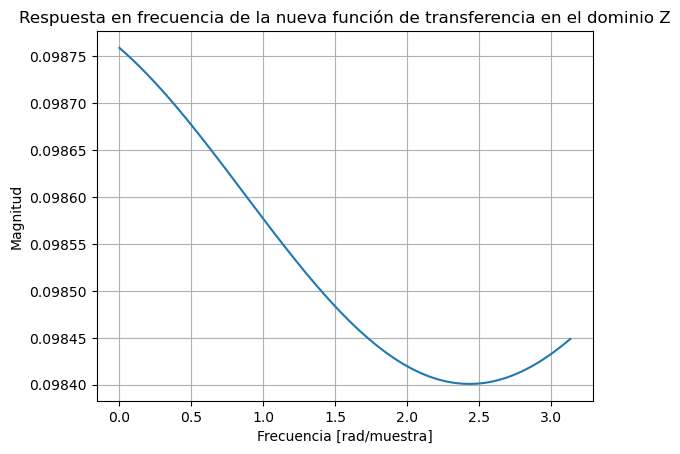

C:\Users\HP\anaconda3\lib\site-packages\numpy\ma\core.py:3379: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Users\HP\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


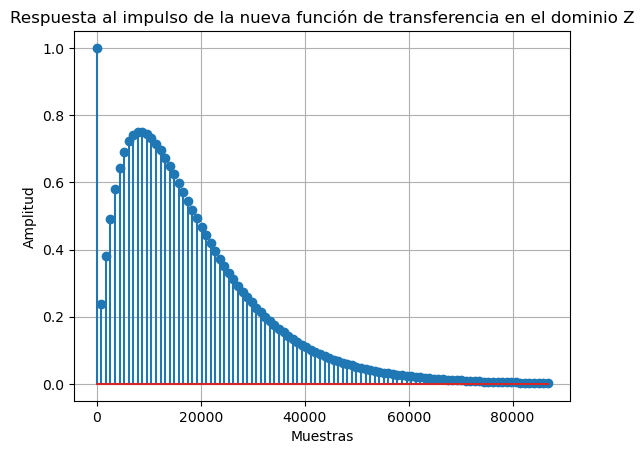

In [1]:
import numpy as np
import scipy as sp  # importar el módulo scipy
import matplotlib.pyplot as plt
from scipy.signal import tf2zpk
from scipy.signal import zpk2tf

# Definir la función de entrada
num = [1, 2, 3]
den = [1, 4, 5, 2]
z, p, k = tf2zpk(num, den)  # Calcular polos, ceros y ganancia
n = 3  # número de muestras a desplazar

# Aplicar la propiedad de desplazamiento temporal
z_new = z * np.exp(-n*np.angle(z))
p_new = p * np.exp(-n*np.angle(p))

# Calcular la nueva función de transferencia en el dominio Z
num_new, den_new = zpk2tf(z_new, p_new, k)

# Imprimir los coeficientes de la función de transferencia de forma legible
print("Coeficientes de la nueva función de transferencia en el dominio Z:")
print("num = ", num_new)
print("den = ", den_new)

# Calcular y graficar la respuesta en frecuencia del sistema
w, H = sp.signal.freqz(num_new, den_new)
plt.plot(w, np.abs(H))
plt.xlabel('Frecuencia [rad/muestra]')
plt.ylabel('Magnitud')
plt.title('Respuesta en frecuencia de la nueva función de transferencia en el dominio Z')
plt.grid()
plt.show()

# Calcular y graficar la respuesta al impulso del sistema
impulse_response = sp.signal.impulse((num_new, den_new))
t = impulse_response[0]
y = impulse_response[1]
plt.stem(t, y)
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('Respuesta al impulso de la nueva función de transferencia en el dominio Z')
plt.grid()
plt.show()
